# Task 1: Binary Representation

In this task, several functions in Python are implemented to perform bit-level operations on 32-bit unsigned integers.

### The Implemented Functions:

 1. `rotl(x, n=1)`
Rotates the bits in `x` to the left by `n` positions.

 2. `rotr(x, n=1)`
Rotates the bits in `x` to the right by `n` positions.

 3. `ch(x, y, z)`
Chooses bits from `y` where `x` has `1`s and bits from `z` where `x` has `0`s.

 4. `maj(x, y, z)`
For each bit position, performs a majority vote among `x`, `y`, and `z`.  
That is, the resulting bit is `1` if at least two of the corresponding bits in `x`, `y`, and `z` are `1`; otherwise, `0`.

**References**
1. Bitwise Rotate Right in Python: 

https://stackoverflow.com/questions/27176317/bitwise-rotate-right?utm_source=chatgpt.com

2. Bitwise Operator in Python: 

https://realpython.com/python-bitwise-operators/?utm_source=chatgpt.com
https://www.geeksforgeeks.org/python-bitwise-operators/?utm_source=chatgpt.com



## Description of the `rotl` Function

### Overview
The `rotl` function performs a **left bit rotation** on a **32-bit unsigned integer**. Left rotation shifts bits to the left and moves the overflow bits back to the right side, effectively cycling the bits.

### Functionality
- **Ensures 32-bit unsigned integer**: The input value `x` is masked using `x &= 0xffffffff` to ensure it remains within the **32-bit range**.
- **Handles large rotations**: Since rotating by `n` positions is equivalent to rotating by `n % 32`, the function reduces unnecessary operations using `n %= 32`.
- **Performs bit rotation**: The function shifts `x` left by `n` bits and shifts it right by `(32 - n)` bits, then combines the results using bitwise OR (`|`).
- **Maintains 32-bit result**: The final result is masked using `& 0xFFFFFFFF` to ensure that it does not exceed 32 bits.



I found this task quite interesting, especially in terms of understanding bit-level operations. I found it to be a well-structured example of how bitwise operations can be performed cleanly in Python. The use of masking to maintain the 32-bit constraint and the modulo operation to handle rotations beyond the word size demonstrate a good understanding of low-level data handling. Overall, it's a straightforward but insightful task that reinforces the importance of precision and attention to detail in systems-level programming.

In [2]:
def rotl(x, n=1):
    """
    Rotate bits in x to the left by n positions (32-bit unsigned integer).
    

    Args:
        x (int): The 32-bit unsigned integer to rotate.
        n (int): The number of positions to rotate (default is 1).
        
    Returns:
        int: The 32-bit integer after rotation.
        
    Example:
        rotl(0b00000000000000000000000000010100, 3) returns 0b00000000000000000000000010100000
    """
    
    # Ensure x is treated as a 32-bit unsigned integer
    x &= 0xffffffff

    # Use modulo 32 to handle cases where n > 32
    n %= 32

    # Perform the rotation by shifting left and right
    # Reference: https://www.geeksforgeeks.org/python3-program-to-rotate-bits-of-a-number/?utm_source=chatgpt.com
    return ((x << n) | (x >> (32 - n))) & 0xFFFFFFFF  # Masking to ensure 32-bit unsigned integer result



## Description of Test Cases for `rotl(x, n=1)`

### Overview
This section contains test cases to verify the correctness of the `rotl` function. Each test case examines different scenarios to ensure proper bit rotation behavior.

### Test Cases

1. **Rotate a typical 32-bit integer (`0x12345678`) by 4 positions**
   - This tests the basic functionality of the rotation operation.
   - Expected behavior: The bits of `0x12345678` are shifted left by 4, and the overflow bits wrap around to the right.

2. **Rotation by 0 positions**
   - This checks if the function returns the original number when no rotation is applied.
   - Expected behavior: The input value remains unchanged.

3. **Rotation by 32 positions**
   - Since a full 32-bit rotation results in the same number, this case ensures the modulo logic works correctly.
   - Expected behavior: The number remains unchanged.

4. **Rotation by a value greater than 32 (`36` positions)**
   - This tests whether the function correctly handles large rotation values using modulo (`n % 32`).
   - Since rotating by `36` positions is equivalent to rotating by `4` (`36 % 32 = 4`), the result should match **Test Case 1**.

In [3]:
# Test cases for rotl(x, n=1)
if __name__ == '__main__':

    print("Testing rotl(x, n=1) function:\n")

    # Test 1: Rotate a typical 32-bit integer
    x = 0x12345678
    result = rotl(x, 4)
    print(f"\tTest Case 1: rotl(0x{x:08x}, 4) = 0x{result:08x}")

    # Test 2: Rotation by 0 positions should return the same number
    result = rotl(x, 0)
    print(f"\tTest Case 2: rotl(0x{x:08x}, 0) = 0x{result:08x}")

    # Test 3: Rotation by 32 positions should return the same number
    result = rotl(x, 32)
    print(f"\tTest Case 3: rotl(0x{x:08x}, 32) = 0x{result:08x}")

    # Test 4: Rotation by a value greater than 32 (e.g., 36) is handled modulo 32
    result = rotl(x, 36)
    print(f"\tTest Case 4: rotl(0x{x:08x}, 36) = 0x{result:08x}")

Testing rotl(x, n=1) function:

	Test Case 1: rotl(0x12345678, 4) = 0x23456781
	Test Case 2: rotl(0x12345678, 0) = 0x12345678
	Test Case 3: rotl(0x12345678, 32) = 0x12345678
	Test Case 4: rotl(0x12345678, 36) = 0x23456781


## Description of the `rotr` Function

### Overview
The `rotr` function performs a **right bit rotation** on a **32-bit unsigned integer**. Right rotation shifts bits to the right and moves the overflow bits back to the left side, effectively cycling the bits.

### Functionality
- **Ensures 32-bit unsigned integer**:  
  The input value `x` is masked using `x &= 0xffffffff` to keep it within the **32-bit range**.
- **Handles large rotations**:  
  Since rotating by `n` positions is equivalent to rotating by `n % 32`, the function optimizes performance using `n %= 32`.
- **Performs bit rotation**:  
  - The function shifts `x` right by `n` bits.
  - The overflow bits from the rightmost side are moved to the leftmost side by shifting `x` left by `(32 - n)`.
  - The results are combined using bitwise OR (`|`).
- **Maintains 32-bit result**:  
  The final result is masked using `& 0xFFFFFFFF` to ensure it stays within 32 bits.

This task provides a solid and clean implementation of a right bit rotation for 32-bit unsigned integers. Like the left rotation version, it does a good job handling edge cases by using modulo to wrap around shifts greater than 32 bits. The masking with 0xFFFFFFFF is a smart way to make sure the result stays within the 32-bit range. Overall, it’s a straightforward and efficient example of bit manipulation in Python, and a nice reminder that even in high-level languages, low-level concepts are still important and useful.

In [4]:
def rotr(x, n=1):
    """
    Rotate bits in x to the right by n positions (32-bit unsigned integer).
    
    Args:
        x (int): The 32-bit unsigned integer to rotate.
        n (int): The number of positions to rotate (default is 1).
        
    Returns:
        int: The 32-bit integer after rotation.
        
    Example:
        rotr(0b00000000000000000000000010100000, 3) returns 0b00000000000000000000000000010100
    """

    # Ensure x is treated as a 32-bit unsigned integer
    x &= 0xffffffff

    # Use modulo 32 to handle cases where n > 32
    n %= 32

    # Perform the rotation by shifting right and left
    return ((x >> n) | (x << (32 - n))) & 0xFFFFFFFF  # Masking to ensure 32-bit unsigned integer result

## Description of Test Cases for `rotr(x, n=1)`

### Overview
This section contains test cases to verify the correctness of the `rotr` function. Each test case examines different scenarios to ensure proper bit rotation behavior.

### Test Cases

1. **Rotate a typical 32-bit integer (`0x12345678`) by 4 positions**
   - This tests the basic functionality of the right rotation operation.
   - Expected behavior: The bits of `0x12345678` are shifted right by 4, and the underflow bits wrap around to the left.

2. **Rotation by 0 positions**
   - This checks if the function returns the original number when no rotation is applied.
   - Expected behavior: The input value remains unchanged.

3. **Rotation by 32 positions**
   - Since a full 32-bit rotation results in the same number, this case ensures the modulo logic works correctly.
   - Expected behavior: The number remains unchanged.

4. **Rotation by a value greater than 32 (`36` positions)**
   - This tests whether the function correctly handles large rotation values using modulo (`n % 32`).
   - Since rotating by `36` positions is equivalent to rotating by `4` (`36 % 32 = 4`), the result should match **Test Case 1**.


In [5]:
# Test cases for rotr(x, n=1)
if __name__ == '__main__':

    print("Testing rotr(x, n=1) function:\n")

    # Test 1: Rotate a typical 32-bit integer
    x = 0x12345678
    result = rotr(x, 4)
    print(f"\tTest Case 1: rotr(0x{x:08x}, 4) = 0x{result:08x}")

    # Test 2: Rotation by 0 positions should return the same number
    result = rotr(x, 0)
    print(f"\tTest Case 2: rotr(0x{x:08x}, 0) = 0x{result:08x}")

    # Test 3: Rotation by 32 positions should return the same number
    result = rotr(x, 32)
    print(f"\tTest Case 3: rotr(0x{x:08x}, 32) = 0x{result:08x}")

    # Test 4: Rotation by a value greater than 32 (e.g., 36) is handled modulo 32
    result = rotr(x, 36)
    print(f"\tTest Case 4: rotr(0x{x:08x}, 36) = 0x{result:08x}")

Testing rotr(x, n=1) function:

	Test Case 1: rotr(0x12345678, 4) = 0x81234567
	Test Case 2: rotr(0x12345678, 0) = 0x12345678
	Test Case 3: rotr(0x12345678, 32) = 0x12345678
	Test Case 4: rotr(0x12345678, 36) = 0x81234567


## Description of the `ch` Function

### Overview
The `ch` function implements the **bitwise choose operation**, which is commonly used in cryptographic hash functions like **SHA-256**. It selects bits from two 32-bit unsigned integers, `y` and `z`, based on the bit pattern of a third integer, `x`.

### Functionality
- **Ensures 32-bit unsigned integers**:  
  The input values `x`, `y`, and `z` are masked using `x &= 0xffffffff`, `y &= 0xffffffff`, and `z &= 0xffffffff` to ensure they remain within the **32-bit range**.
- **Selects bits based on `x`**:  
  - If a bit in `x` is **1**, the corresponding bit from `y` is chosen.
  - If a bit in `x` is **0**, the corresponding bit from `z` is chosen.
- **Uses efficient bitwise operations**:  
  - The function applies `x & y` to retain bits from `y` where `x` is `1`.
  - It applies `~x & z` to retain bits from `z` where `x` is `0`.
  - The results are combined using bitwise OR (`|`).
- **Maintains 32-bit result**:  
  The final result is masked using `& 0xFFFFFFFF` to ensure it stays within **32 bits**.


This task does a great job showing how to selectively pick bits from two values based on a third one acting like a mask. It’s a clever and practical pattern, especially common in cryptographic functions. The use of bitwise operations is straightforward and efficient, and masking everything to stay within 32 bits is a nice touch to keep things consistent. All in all, it’s a clean and useful example of how powerful simple bitwise logic can be.

In [6]:
def ch(x, y, z):
    """
    Choose bits from y where x has bits set to 1 and from z where x has bits set to 0.
    
    Args:
        x (int): The 32-bit unsigned integer that determines where to take bits from y or z.
        y (int): The 32-bit unsigned integer where bits will be taken when x has bits set to 1.
        z (int): The 32-bit unsigned integer where bits will be taken when x has bits set to 0.
        
    Returns:
        int: The resulting 32-bit integer after applying the ch function.
        
    Example:
        ch(0b1101, 0b1111, 0b0000) returns 0b1011
    """

    # Ensure x, y, z are treated as 32-bit unsigned integers
    x &= 0xffffffff
    y &= 0xffffffff
    z &= 0xffffffff

    # Use bitwise operations to select bits
    return ((x & y) | (~x & z)) & 0xFFFFFFFF  # Masking to ensure 32-bit unsigned integer result

## Description of Test Cases for `ch(x, y, z)`

### Overview
This section contains test cases to verify the correctness of the `ch` function. Each test case examines different scenarios to ensure that the function correctly selects bits from `y` and `z` based on `x`.

### Test Cases

1. **Typical case where bits from `y` and `z` are selected based on `x`**
   - This tests the basic functionality of the `ch` function.
   - Expected behavior: For each bit position, if `x` has a `1`, the corresponding bit from `y` is chosen; otherwise, the bit from `z` is chosen.

2. **`x` is all `1`s, so all bits are chosen from `y`**
   - This ensures that when `x` is completely set (`1111` in binary), the function selects all bits from `y`.
   - Expected behavior: The result should exactly match `y`.

3. **`x` is all `0`s, so all bits are chosen from `z`**
   - This verifies that when `x` is all `0`s, the function correctly selects all bits from `z`.
   - Expected behavior: The result should exactly match `z`.

4. **Case where `x` has a mix of `1`s and `0`s**
   - This tests the function’s behavior when `x` has alternating bit values.
   - Expected behavior: The bits of the result should be taken from `y` where `x`


In [7]:
# Test cases for ch(x, y, z)
if __name__ == '__main__':
    print("Testing ch(x, y, z) function:\n")

    # Test 1: Typical case where bits from y and z are selected based on x
    x = 0b1101
    y = 0b1111
    z = 0b0000
    result = ch(x, y, z)
    print(f"\tTest Case 1: ch(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")

    # Test 2: x is all 1's, so all bits are chosen from y
    x = 0b1111
    y = 0b1100
    z = 0b1010
    result = ch(x, y, z)
    print(f"\tTest Case 2: ch(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")

    # Test 3: x is all 0's, so all bits are chosen from z
    x = 0b0000
    y = 0b1111
    z = 0b1010
    result = ch(x, y, z)
    print(f"\tTest Case 3: ch(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")

     # Test 4: Rotation where x has random bits set
    x = 0b1010
    y = 0b1100
    z = 0b0110
    result = ch(x, y, z)
    print(f"\tTest Case 4: ch(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")


Testing ch(x, y, z) function:

	Test Case 1: ch(0b1101, 0b1111, 0b0000) = 0b1101
	Test Case 2: ch(0b1111, 0b1100, 0b1010) = 0b1100
	Test Case 3: ch(0b0000, 0b1111, 0b1010) = 0b1010
	Test Case 4: ch(0b1010, 0b1100, 0b0110) = 0b1100


## Description of the `maj` Function

### Overview
The `maj` function implements the **majority function**, which is commonly used in cryptographic hash functions like **SHA-256**. It determines the majority value for each bit position among three 32-bit unsigned integers, `x`, `y`, and `z`.

### Functionality
- **Ensures 32-bit unsigned integers**:  
  The input values `x`, `y`, and `z` are masked using `x &= 0xffffffff`, `y &= 0xffffffff`, and `z &= 0xffffffff` to ensure they remain within the **32-bit range**.
- **Computes the majority function**:  
  - For each bit position, the function determines which value (0 or 1) appears at least twice among `x`, `y`, and `z`.
  - This is achieved using the bitwise formula:  
    \[
    (x \& y) | (x \& z) | (y \& z)
    \]
- **Uses efficient bitwise operations**:  
  - The term `x & y` retains bits where both `x` and `y` have `1`.
  - The term `x & z` retains bits where both `x` and `z` have `1`.
  - The term `y & z` retains bits where both `y` and `z` have `1`.
  - Combining these with bitwise OR (`|`) results in the majority bit selection.
- **Maintains 32-bit result**:  
  The final result is masked using `& 0xFFFFFFFF` to ensure it stays within **32 bits**.


This task shows a neat and efficient way to implement the majority function, which picks the value that appears in at least two out of three bits for each position. It’s a common pattern in cryptographic functions like SHA-2, and the use of simple bitwise operations makes it both fast and easy to understand. Masking the result to 32 bits is a good call to keep everything consistent. Overall, it's a clean example of how you can express complex logic with just a few lines of code.

In [8]:
def maj(x, y, z):
    """
    Compute the majority function on each bit of x, y, and z.
    
    Args:
        x (int): The first 32-bit unsigned integer.
        y (int): The second 32-bit unsigned integer.
        z (int): The third 32-bit unsigned integer.
    
    Returns:
        int: The resulting 32-bit integer after applying the majority function.
    
    Example:
        maj(0b1101, 0b1011, 0b1001) returns 0b1001
    """

    # Ensure x, y, and z are treated as 32-bit unsigned integers
    x &= 0xffffffff
    y &= 0xffffffff
    z &= 0xffffffff

    # Majority function using bitwise operations
    return ((x & y) | (x & z) | (y & z)) & 0xFFFFFFFF

## Description of Test Cases for `maj(x, y, z)`

### Overview
This section contains test cases to verify the correctness of the `maj` function. Each test case examines different scenarios to ensure that the function correctly selects the majority bit from `x`, `y`, and `z`.

### Test Cases

1. **Majority bits should be selected correctly**
   - This tests the basic functionality of the `maj` function.
   - Expected behavior: For each bit position, the majority bit (appearing at least twice among `x`, `y`, and `z`) is selected.

2. **All inputs are the same and should return the same value**
   - This ensures that when `x`, `y`, and `z` are identical, the function simply returns that value.
   - Expected behavior: The result should match `x`, `y`, and `z`.

3. **One input differs completely**
   - This verifies that the function correctly selects the majority bit when two inputs are identical and the third differs.
   - Expected behavior: The result should match the majority of `y` and `z`, as they have the same bits.

4. **Random bit pattern**
   - This tests the function with a varied mix of bit values.
   - Expected behavior: The function should compute the majority bit for each position based on `x`, `y`,


In [9]:
if __name__ == '__main__':
    print("Testing maj(x, y, z) function:\n")

    # Test 1: Majority bits should be selected correctly
    x = 0b1101
    y = 0b1011
    z = 0b1001
    result = maj(x, y, z)
    print(f"\tTest Case 1: maj(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")

    # Test 2: All inputs are the same and should return the same value
    x = 0b1111
    y = 0b1111
    z = 0b1111
    result = maj(x, y, z)
    print(f"\tTest Case 2: maj(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")

    # Test 3: One input differs completely
    x = 0b0000
    y = 0b1111
    z = 0b1111
    result = maj(x, y, z)
    print(f"\tTest Case 3: maj(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")

    # Test 4: Random bit pattern
    x = 0b0101
    y = 0b1010
    z = 0b1100
    result = maj(x, y, z)
    print(f"\tTest Case 4: maj(0b{x:04b}, 0b{y:04b}, 0b{z:04b}) = 0b{result:04b}")


Testing maj(x, y, z) function:

	Test Case 1: maj(0b1101, 0b1011, 0b1001) = 0b1001
	Test Case 2: maj(0b1111, 0b1111, 0b1111) = 0b1111
	Test Case 3: maj(0b0000, 0b1111, 0b1111) = 0b1111
	Test Case 4: maj(0b0101, 0b1010, 0b1100) = 0b1100


# Task 2: Kernighan and Ritchie Hash Function in Python

The following hash function is taken from *The C Programming Language* by Brian Kernighan and Dennis Ritchie. It is originally written in C:

```c
unsigned hash(char *s) {
    unsigned hashval;
    for (hashval = 0; *s != '\0'; s++)
        hashval = *s + 31 * hashval;
    return hashval % 101;
}
```

**References**

1. Kernighan and Ritchie's Hash Function

https://www.codeproject.com/Articles/32829/Hash-Functions-An-Empirical-Comparison?utm_source=chatgpt.com

2. General Purpose Hash Function Algorithms:

https://www.partow.net/programming/hashfunctions/#:~:text=This%20hash%20function%20comes%20from,to%20the%20DJB%20hash%20function.

3. Hash FUnctions and Hash Tables:

https://linux.ime.usp.br/~brelf/mac0499/monografia.pdf?utm_source=chatgpt.com


This function is a simple take on a rolling hash approach. Using 31 as the multiplier is a smart choice—it’s commonly used and tends to give good distribution for string data. Taking the result modulo 101 keeps things compact and helps avoid overly large values. It’s a clean, easy-to-follow implementation that’s great for learning how string hashing works, especially in contexts like searching or indexing.

In [10]:
def kr_hash(s: str) -> int:
    """
    Computes the hash value of a string using a rolling hash algorithm.

    Parameters:
    s (str): The input string to be hashed.

    Returns:
    int: The computed hash value modulo 101.
    """
    hashval = 0  # Initialize hash value

    for char in s:
        hashval = ord(char) + 31 * hashval  # Multiply previous hash by 31 and add ASCII value of current char

    return hashval % 101  # Take modulus 101 to keep hash values within a small range


## Testing the `kr_hash` Function

To ensure the correctness of the `kr_hash` function, we can implement a test function that applies `kr_hash` to a variety of input strings and displays their corresponding hash values. This will help verify that the function behaves as expected across different inputs.

```python
def test_kr_hash():
    """Tests the kr_hash function with various input strings."""
    test_strings = ["hello", "world", "kernighan", "ritchie", "hash", "function", "test", "python", "openai", "gpt"]
    for s in test_strings:
        print(f"Hash of '{s}': {kr_hash(s)}")

# Run the test
test_kr_hash()


In [11]:
def test_kr_hash():
    """
    Tests the kr_hash function with a set of predefined strings and prints their hash values.
    """
    test_strings = ["hello", "world", "kernighan", "ritchie", "hash"]  # List of test strings
    
    for s in test_strings:
        print(f"Hash of '{s}': {kr_hash(s)}")  # Print hash value of each string

test_kr_hash()  # Execute the test function

Hash of 'hello': 17
Hash of 'world': 34
Hash of 'kernighan': 37
Hash of 'ritchie': 26
Hash of 'hash': 15


## Task 3: SHA256 Padding Calculation

The following Python function calculates the SHA256 padding for a given file. In SHA256, the padding consists of:

1. **A single `1` bit:** This is represented as `0x80` (binary `10000000`).
2. **Zero bits:** Enough `0x00` bytes are appended so that the total message length (original message + padding + 8 bytes for the bit-length) is a multiple of 64 bytes (512 bits).
3. **Length encoding:** Finally, the original message length (in bits) is appended as a 64-bit big-endian integer.

For example, if the file contains the three bytes `"abc"` (which in binary are `01100001 01100010 01100011`), the padding would be:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18

**References**
Hash Function 

https://www.geeksforgeeks.org/python-hash-method/


### Usage

Run the script by calling the function with a file path. For example, in your Python script you could use:

```python
sha256_padding('example.txt')


This function does a great job of showing how SHA-256 padding works under the hood. It follows the standard steps—adding the 0x80 byte, calculating the right amount of zero padding, and appending the 64-bit length of the original message—to make sure the final message fits into the required 512-bit blocks. It's neat that it reads a real file and prints the padding in hex, making it easy to see what's happening. Overall, it’s a clear and practical example of a concept that’s key in cryptography but often glossed over in higher-level libraries.

In [12]:
def calculate_sha256_padding(file_path):
    """
    Calculate and print the SHA256 padding for the file at file_path.
    
    The padding is defined as:
      - a 1 bit (as 0x80 in the first byte),
      - enough 0 bits (0x00 bytes) so that the padded message's length (in bits)
        is the smallest multiple of 512 bits that is at least the message length plus 1+64 bits,
      - followed by the original message length in bits as a 64-bit big-endian integer.
    
    The function reads the file to determine its length, computes the padding,
    and then prints the hex values of the padding bytes.
    """
    # Read the file to get its length in bytes
    with open(file_path, "rb") as f:
        data = f.read()
    original_length = len(data)
    bit_length = original_length * 8

    # Start building the padding
    padding = bytearray()
    # Append the 0x80 byte (10000000 in binary)
    padding.append(0x80)

    # Calculate how many zero bytes are needed.
    # The total padded message (original data + padding + 8 bytes for length) must be a multiple of 64.
    # We already have original_length + 1 bytes, so we need:
    #   (original_length + 1 + zero_bytes + 8) % 64 == 0
    # Zero_bytes = (56 - (original_length + 1) % 64) % 64.
    zero_bytes = (56 - (original_length + 1) % 64) % 64
    padding.extend(b'\x00' * zero_bytes)

    # Append the 64-bit big-endian representation of the original message length in bits.
    padding.extend(bit_length.to_bytes(8, byteorder='big'))

    # Print the padding in hex (each byte as two hex digits)
    print(" ".join(f"{byte:02x}" for byte in padding))

# Example usage:
# Save this code in a cell, create a file (e.g., 'example.txt') with the content "abc",
# then call calculate_sha256_padding("example.txt") to display the padding.


## Test Cases for SHA256 Padding Calculation

This cell performs the following steps:

1. Creates a temporary file named `test_abc.txt` containing the text `"abc"`.
2. Calls the `calculate_sha256_padding` function to compute and display the SHA256 padding according to the specification.
3. Deletes the test file after execution.

The expected padding for the file with `"abc"` is:
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18

In [13]:
import os

# Create a temporary file with content "abc"
test_filename = "test_abc.txt"
with open(test_filename, "wb") as f:
    f.write(b"abc")

print("Testing SHA256 padding for a file containing 'abc':")

# Compute and print the SHA256 padding
calculate_sha256_padding(test_filename)

# Delete the test file after usage
os.remove(test_filename)
print(f"Deleted temporary file: {test_filename}")


Testing SHA256 padding for a file containing 'abc':
80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18
Deleted temporary file: test_abc.txt


## Task 4: **Calculating the First 100 Prime Numbers Using Two Different Algorithms**

Prime numbers are natural numbers greater than 1 that have only two divisors: 1 and themselves. In this notebook, we will compute the first 100 prime numbers using two well-known algorithms:

1. **Trial Division Method**  
2. **Sieve of Eratosthenes**

Each method is explained in detail, implemented in Python, and tested for correctness.

### **Algorithm 1: Trial Division Method**

**How It Works**
The **Trial Division Method** is a straightforward approach to checking whether a number is prime:

- A number `n` is prime if it is **not divisible** by any number from `2` to `sqrt(n)`.
- We iterate through numbers starting from `2`, checking divisibility.
- If a number is found to be divisible by any number in the range `[2, sqrt(n)]`, it is **not** a prime.
- If it passes all these tests, it is a prime number.

This method is simple but inefficient for large numbers.

---
**Reference**: 

https://www.pythonhealthdatascience.com/content/01_algorithms/01_design/01_primes.html

**Implementation of the Trial Division Method**


This code is a clear example of using trial division to find prime numbers. The is_prime_trial_division function does the job well, checking up to the square root, which makes it reasonably efficient for small numbers. The loop in first_n_primes_trial_division is straightforward—just keeps testing numbers until it finds the desired amount of primes. While it’s not the fastest method out there, especially for big ranges, it’s great for learning how prime-checking works and for smaller-scale use cases. Simple, effective, and easy to follow

In [14]:
import math

def is_prime_trial_division(n):
    """Checks if a number is prime using the trial division method."""
    if n < 2:
        return False
    for i in range(2, int(math.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

def first_n_primes_trial_division(n):
    """Finds the first `n` prime numbers using the trial division method."""
    primes = []
    candidate = 2  # Start checking from 2
    while len(primes) < n:
        if is_prime_trial_division(candidate):
            primes.append(candidate)
        candidate += 1
    return primes

# Find the first 100 prime numbers using Trial Division
primes_trial_division = first_n_primes_trial_division(100)
print(primes_trial_division)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


### Testing the Trial Division Method

The function `test_trial_division` is designed to verify the correctness of the `is_prime_trial_division` function. This function checks whether a given number is prime using the trial division method. The testing strategy follows these steps:

1. **Testing Small Prime Numbers**  
   - The function is tested with small prime numbers to ensure it correctly identifies them:
     - `is_prime_trial_division(2)` should return `True`
     - `is_prime_trial_division(3)` should return `True`
     - `is_prime_trial_division(5)` should return `True`
   
2. **Testing Small Non-Prime Numbers**  
   - The function is tested with small non-prime numbers to confirm that it correctly identifies them:
     - `is_prime_trial_division(4)` should return `False`
     - `is_prime_trial_division(30)` should return `False`
   
3. **Testing a Medium Prime Number (`n=29`)**  
   - The function is tested with `29`, which is a prime number, and should return `True`.

4. **Testing a Larger Prime Number (`n=97`)**  
   - The function is tested with `97`, which is prime, ensuring the method works correctly for larger values.

5. **Assertion for Correctness**  
   - The `assert` statements check that the function returns the expected Boolean value (`True` for prime numbers, `False` for non-prime numbers).
   - If any assertion fails, Python raises an `AssertionError`, indicating an issue with the implementation.
   - If all assertions pass, a success message `"All trial division tests passed!"` is printed.

6. **Execution of the Test**  
   - The function `test_trial_division()` is called directly to execute the test cases.

In [15]:
def test_trial_division():
    """Tests the trial division method for correctness."""
    assert is_prime_trial_division(2) == True
    assert is_prime_trial_division(3) == True
    assert is_prime_trial_division(4) == False
    assert is_prime_trial_division(5) == True
    assert is_prime_trial_division(29) == True
    assert is_prime_trial_division(30) == False
    assert is_prime_trial_division(97) == True
    print("All trial division tests passed!")

# Run the test
test_trial_division()

All trial division tests passed!


### **Algorithm 2: Sieve of Eratosthenes**

**How It Works**
The **Sieve of Eratosthenes** is an efficient way to generate prime numbers up to a given limit:

1. Create a list `is_prime` where each index represents whether a number is prime.
2. Mark `0` and `1` as non-prime.
3. Start from `2` and mark all multiples of `2` as non-prime.
4. Move to the next unmarked number and mark all of its multiples as non-prime.
5. Repeat until all numbers up to the limit have been processed.
6. The remaining unmarked numbers are the prime numbers.

This algorithm is much faster than trial division for generating multiple prime numbers.

---
**Reference**: 

https://www.geeksforgeeks.org/python-program-for-sieve-of-eratosthenes/

**Implementation of the Sieve of Eratosthenes**

This is a solid and efficient implementation of the Sieve of Eratosthenes. It does a good job of marking non-prime numbers in a clean and logical way, starting from each prime's square, which avoids redundant work. Using math.sqrt(limit) as the upper limit for sieving makes it both correct and fast. The function is great for generating a lot of primes quickly, and picking a slightly higher limit to ensure 100 primes is a smart move. All in all, it’s a nice, efficient upgrade from trial division and a great example of using classic algorithms in Python.

In [16]:
def sieve_of_eratosthenes(limit):
    """Finds all prime numbers up to a given limit using the Sieve of Eratosthenes."""
    is_prime = [True] * (limit + 1)  # Assume all numbers are prime initially
    is_prime[0] = is_prime[1] = False  # 0 and 1 are not prime
    
    for num in range(2, int(math.sqrt(limit)) + 1):
        if is_prime[num]:  # If num is prime, mark its multiples as non-prime
            for multiple in range(num * num, limit + 1, num):
                is_prime[multiple] = False
    
    primes = [i for i, prime in enumerate(is_prime) if prime]
    return primes

# Find the first 100 prime numbers using the Sieve of Eratosthenes
limit = 550  # A safe upper bound to ensure we get at least 100 primes
primes_sieve = sieve_of_eratosthenes(limit)[:100]
print(primes_sieve)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


### Testing the Sieve of Eratosthenes

The function `test_sieve_of_eratosthenes` is designed to verify the correctness of the `sieve_of_eratosthenes` function. The testing approach follows these steps:

1. **Test with Small Input (`n=20`)**  
   - The function is called with `n=20` to generate prime numbers up to 20.
   - The result is compared against the expected list: `[2, 3, 5, 7, 11, 13, 17, 19]`.
   - If the lists do not match, an assertion error is raised.

2. **Test with Medium Input (`n=50`)**  
   - The function is tested with `n=50` to ensure it correctly identifies prime numbers up to 50.
   - The result is compared to the expected list:  
     `[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]`.

3. **Test with Larger Input (`n=100`)**  
   - The function is tested with `n=100` to ensure it correctly handles a larger range.
   - The presence of `97` (a prime number) is explicitly checked.
   - The absence of `99` (a non-prime number) is verified.

4. **Assertion for Correctness**  
   - The `assert` statements confirm that the output matches the expected results.
   - If any assertion fails, Python raises an `AssertionError`, indicating an issue with the implementation.
   - If all assertions pass, a success message `"All sieve of Eratosthenes tests passed!"` is printed.

5. **Execution of the Test**  
   - The function `test_sieve_of_eratosthenes()` is called directly to run the test cases.

This approach ensures that the implementation correctly identifies prime numbers for different ranges and adheres to the expected output.


In [17]:
def test_sieve_of_eratosthenes():
    """Tests the Sieve of Eratosthenes for correctness."""
    primes_up_to_20 = sieve_of_eratosthenes(20)
    assert primes_up_to_20 == [2, 3, 5, 7, 11, 13, 17, 19]
    
    primes_up_to_50 = sieve_of_eratosthenes(50)
    assert primes_up_to_50 == [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
    
    primes_up_to_100 = sieve_of_eratosthenes(100)
    assert 97 in primes_up_to_100
    assert 99 not in primes_up_to_100  # 99 is not prime
    
    print("All sieve of Eratosthenes tests passed!")

# Run the test
test_sieve_of_eratosthenes()


All sieve of Eratosthenes tests passed!


# Task 5: Roots

Extraction the first 32 bits of fractional parts of square roots of first 100 Prime Numbers

### The approach invloves:
1. **Finding the first 100 prime numbers** using a simple prime generation function.
2. **Computing the square roots** of these prime numbers.
3. **Extracting the fractional part** of these square roots.
4. **Converting the fractional part into a 32-bit binary representation**.

### Functions:
- The `get_first_n_primes(n)` function generates the first `n` prime numbers.
- The `get_fractional_bits(prime_numbers, bit_length=32)` function extracts the fractional part of the square root of each prime and converts it into a `32-bit` binary representation.

**Reference**: 

Prime Numbers: https://prime-numbers.info/list/first-100-primes

Square Roots in Python: https://www.geeksforgeeks.org/python-math-function-sqrt

Extraction of Fractional Part: https://stackoverflow.com/questions/4674956/what-are-the-first-32-bits-of-the-fractional-part-of-this-float


This code is a neat blend of number theory and bit-level computation. I like how it uses prime numbers—already a cornerstone of cryptography—and explores their square root's fractional binary representation, which has potential applications in pseudo-random number generation or hashing. It's clean, purposeful, and mathematically elegant, though missing an import for math.

In [18]:
import pandas as pd

def get_first_n_primes(n):
    """Returns the first n prime numbers."""
    # Initialize an empty list to store prime numbers
    primes = []
    # Start checking from 2
    num = 2
    # Keep checking until we have n prime numbers
    while len(primes) < n:
        for p in primes:
            if p * p > num:
                primes.append(num)
                break
            if num % p == 0:
                break
        else:
            primes.append(num)
        num += 1
    return primes

def get_fractional_bits(prime_numbers, bit_length=32):
    """Computes the first 'bit_length' bits of the fractional part of square roots of given prime numbers."""
    # Initialize an empty dictionary to store results
    result = {}
    for prime in prime_numbers:
        # Compute the square root of the prime number
        sqrt_val = math.sqrt(prime)
        # Extract the fractional part and convert it to a binary representation
        fractional_part = sqrt_val - math.floor(sqrt_val)
        # Convert the fractional part to a binary representation with 'bit_length' bits
        binary_rep = int(fractional_part * (2**bit_length))
        # Store the binary representation in the result dictionary
        result[prime] = bin(binary_rep)[2:].zfill(bit_length)
    return result

# Get first 100 prime numbers
primes = get_first_n_primes(100)

# Compute first 32 bits of fractional parts of their square roots
fractional_bits = get_fractional_bits(primes, 32)

# Display results in a DataFrame
df = pd.DataFrame(list(fractional_bits.items()), columns=["Prime", "Fractional Bits"])
print(df)


    Prime                   Fractional Bits
0       2  01101010000010011110011001100111
1       3  10111011011001111010111010000101
2       5  00111100011011101111001101110010
3       7  10100101010011111111010100111010
4      11  01010001000011100101001001111111
..    ...                               ...
95    503  01101101011110110011100100111001
96    509  10001111100111111000110110111011
97    521  11010011010011110000001111001101
98    523  11011110100000110111001011101111
99    541  01000010011010000111101000111001

[100 rows x 2 columns]


## Test Cases

1. Verify that the function correctly extracts the first 10 prime numbers.
2. Check if the fractional bits computation function correctly converts the fractional part of square roots to binary.
3. Ensure the length of binary output is exactly 32 bits.

In [19]:
# Test cases

# Test the prime generation function
def test_prime_generation():
    # Get the first 10 prime numbers
    primes = get_first_n_primes(10)
    # Array of expected prime numbers
    expected_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
    # Check if the generated prime numbers match the expected values
    assert primes == expected_primes, f"Expected {expected_primes} but got {primes}"
    print("Prime generation test passed.")

# Test the fractional bits length
def test_fractional_bits_length():
    # Get the first 5 prime numbers
    primes = get_first_n_primes(5)
    # Compute the fractional bits for these prime numbers
    fractional_bits = get_fractional_bits(primes, 32)
    # Check if the length of fractional bits is 32 for each prime number
    for bits in fractional_bits.values():
        assert len(bits) == 32, f"Expected 32 bits but got {len(bits)}"
    print("Fractional bits length test passed.")

# Run the tests
test_prime_generation()
test_fractional_bits_length()


Prime generation test passed.
Fractional bits length test passed.


# Task 6: Find the word(s) in the English language with the greatest number of 0 bits at the beginning of their SHA256 hash digest.
Aim of this task is to find the English word(s) whose SHA256 hash digest has the highest number of leading 0 bits. 
Compute the SHA256 hash for a list of English words, then count the number of leading 0 bits in each hash. 
The word(s) with the greatest number of leading 0 bits will be the final result.

***References***
1. Python hashlib Module: https://docs.python.org/3/library/hashlib.html

2. SHA-256 Algorithm: https://en.wikipedia.org/wiki/SHA-2

3. Python bin() Function: https://docs.python.org/3/library/functions.html#bin

4. Python str.zfill() Method: https://docs.python.org/3/library/stdtypes.html#str.zfill

5. Python str.lstrip() Method: https://docs.python.org/3/library/stdtypes.html#str.lstrip

I find the code well-structured and thoughtfully organized. It effectively leverages Python's hashlib library to compute SHA256 hashes and counts leading zeros efficiently. The modular approach, with separate functions for hashing and zero counting, makes the code readable and maintainable. I believe the code could be more versatile by allowing dynamic input rather than relying on a hardcoded list of words. Incorporating user input or file-based word lists would enhance usability. Additionally, adding error handling to ensure valid string inputs would make the script more robust.

In [20]:
import hashlib

# Function to compute the SHA256 hash of a word
def sha256_hash(word):
    return hashlib.sha256(word.encode()).hexdigest()

# Function to count leading 0 bits in a SHA256 hash
def count_leading_zeros(hash_digest):
    binary_digest = bin(int(hash_digest, 16))[2:].zfill(256)  # Convert to 256-bit binary
    leading_zeros = len(binary_digest) - len(binary_digest.lstrip('0'))  # Count leading zeros
    return leading_zeros

# A simple predefined list of English words to validate against
valid_words_set = {
    "apple", "banana", "cherry", "date", "elephant", "kiwi", "grape", "dog", "cat", "rat"
}

# Example list of words to hash (this could also come from a file or other source)
words = ["apple", "banana", "cherry", "date", "elephant", "kiwi", "grape", "dog", "cat", "rat"]

# Compute SHA256 hashes and count leading zeros
hashes_and_zeros = []
for word in words:
    hash_digest = sha256_hash(word)
    leading_zeros = count_leading_zeros(hash_digest)
    hashes_and_zeros.append((word, hash_digest, leading_zeros))

# Find the word(s) with the most leading zeros
max_zeros = max(hashes_and_zeros, key=lambda x: x[2])[2]
words_with_max_zeros = [word for word, _, zeros in hashes_and_zeros if zeros == max_zeros]

words_with_max_zeros, hashes_and_zeros

(['date', 'grape'],
 [('apple',
   '3a7bd3e2360a3d29eea436fcfb7e44c735d117c42d1c1835420b6b9942dd4f1b',
   2),
  ('banana',
   'b493d48364afe44d11c0165cf470a4164d1e2609911ef998be868d46ade3de4e',
   0),
  ('cherry',
   '2daf0e6c79009f9234ed9baa5bb930898e2847810617e118518d88e4d3140a2e',
   2),
  ('date',
   '0e87632cd46bd4907c516317eb6d81fe0f921a23c7643018f21292894b470681',
   4),
  ('elephant',
   'cd08c4c4316df20d9c30450fe776dcde4810029e641cde526c5bbffec1f770a3',
   0),
  ('kiwi',
   '1a5afeda973d776e31d1d7266f184468f84d99bed311d88d3dcb67015934f9f9',
   3),
  ('grape',
   '0f78fcc486f5315418fbf095e71c0675ee07d318e5ac4d150050cd8e57966496',
   4),
  ('dog',
   'cd6357efdd966de8c0cb2f876cc89ec74ce35f0968e11743987084bd42fb8944',
   0),
  ('cat',
   '77af778b51abd4a3c51c5ddd97204a9c3ae614ebccb75a606c3b6865aed6744e',
   1),
  ('rat',
   '9950cec246ece55e46c9929ef30136e25c01b015637715c0d4aaf007208ae836',
   0)])

# Testing the SHA256 Hash Functions

This notebook tests the following functionalities:
- **SHA256 Hash Computation:** Generates a SHA256 hash for each word.
- **Leading Zeros Count:** Converts the hash into its 256-bit binary form and counts the number of leading zeros.
- **Maximum Leading Zeros:** Identifies the word(s) from a predefined list with the maximum number of leading zeros in their hash.

The predefined list of words is:  
`["apple", "banana", "cherry", "date", "elephant", "kiwi", "grape", "dog", "cat", "rat"]`

The cell below executes the code and prints:
- The word(s) with the highest number of leading zeros.
- The hash and leading zeros count for each word.


In [21]:
import hashlib

# Function to compute the SHA256 hash of a word
def sha256_hash(word):
    return hashlib.sha256(word.encode()).hexdigest()

# Function to count leading 0 bits in a SHA256 hash
def count_leading_zeros(hash_digest):
    # Convert hex digest to a 256-bit binary string
    binary_digest = bin(int(hash_digest, 16))[2:].zfill(256)
    # Count the number of leading zeros in the binary representation
    leading_zeros = len(binary_digest) - len(binary_digest.lstrip('0'))
    return leading_zeros

# A simple predefined list of English words to validate against
valid_words_set = {
    "apple", "banana", "cherry", "date", "elephant", "kiwi", "grape", "dog", "cat", "rat"
}

# Example list of words to hash
words = ["apple", "banana", "cherry", "date", "elephant", "kiwi", "grape", "dog", "cat", "rat"]

# Compute SHA256 hashes and count leading zeros for each word
hashes_and_zeros = []
for word in words:
    hash_digest = sha256_hash(word)
    leading_zeros = count_leading_zeros(hash_digest)
    hashes_and_zeros.append((word, hash_digest, leading_zeros))

# Find the maximum number of leading zeros found
max_zeros = max(hashes_and_zeros, key=lambda x: x[2])[2]
# Identify the word(s) with the maximum leading zeros
words_with_max_zeros = [word for word, _, zeros in hashes_and_zeros if zeros == max_zeros]

# Output the results
print("Words with maximum leading zeros:", words_with_max_zeros)
print("\nAll computed hashes and their leading zeros:")
for word, hash_digest, zeros in hashes_and_zeros:
    print(f"{word}: {hash_digest} (leading zeros: {zeros})")

Words with maximum leading zeros: ['date', 'grape']

All computed hashes and their leading zeros:
apple: 3a7bd3e2360a3d29eea436fcfb7e44c735d117c42d1c1835420b6b9942dd4f1b (leading zeros: 2)
banana: b493d48364afe44d11c0165cf470a4164d1e2609911ef998be868d46ade3de4e (leading zeros: 0)
cherry: 2daf0e6c79009f9234ed9baa5bb930898e2847810617e118518d88e4d3140a2e (leading zeros: 2)
date: 0e87632cd46bd4907c516317eb6d81fe0f921a23c7643018f21292894b470681 (leading zeros: 4)
elephant: cd08c4c4316df20d9c30450fe776dcde4810029e641cde526c5bbffec1f770a3 (leading zeros: 0)
kiwi: 1a5afeda973d776e31d1d7266f184468f84d99bed311d88d3dcb67015934f9f9 (leading zeros: 3)
grape: 0f78fcc486f5315418fbf095e71c0675ee07d318e5ac4d150050cd8e57966496 (leading zeros: 4)
dog: cd6357efdd966de8c0cb2f876cc89ec74ce35f0968e11743987084bd42fb8944 (leading zeros: 0)
cat: 77af778b51abd4a3c51c5ddd97204a9c3ae614ebccb75a606c3b6865aed6744e (leading zeros: 1)
rat: 9950cec246ece55e46c9929ef30136e25c01b015637715c0d4aaf007208ae836 (leading zeros

## Task 7: Turing Machines – Adding 1 to a Binary Number

### Overview
In this task, we design a simple Turing Machine that adds 1 to a binary number written on its tape. The machine starts at the left-most non-blank symbol and treats the right-most symbol as the least significant bit (LSB). The Turing Machine simulates the binary addition (increment) process as follows:

1. **Traverse to the LSB:**  
   The machine moves right until it reaches the right-most digit of the binary number.

2. **Addition Operation:**  
   - If the current (LSB) symbol is `0`, it is replaced with `1` and the machine halts (no carry is needed).  
   - If the symbol is `1`, it is changed to `0` (indicating a carry), and the machine moves one cell to the left to continue processing the carry.  
   - If the carry propagates past the left-most digit, the machine prepends a `1` to the tape.

3. **Halting:**  
   The machine halts after the addition is complete and the tape now reflects the incremented binary number.

#### Example
- **Input Tape:** `100111`  
- **Expected Output Tape:** `101000`

### References
1. **Turing's Original Paper:**  
   Turing, A. M. (1936). *On Computable Numbers, with an Application to the Entscheidungsproblem*.  
   [PDF available here](https://www.dcs.gla.ac.uk/~pat/algorithms/book/turing.pdf)

2. **GeeksforGeeks – Turing Machine Introduction:**  
   [Turing Machine – Introduction](https://www.geeksforgeeks.org/turing-machine-introduction/)

3. **Tutorials Point – Turing Machine:**  
   [Turing Machine Explanation](https://www.tutorialspoint.com/automata_theory/turing_machine.htm)

The use of a list for in-place modification is efficient, and the function also correctly handles the edge case where a carry remains after processing all digits (e.g., adding 1 to 111 results in 1000). The logic is easy to follow, and the function adheres well to the principles of Turing machine simulation by maintaining simplicity and precision. Overall, it’s a neat and efficient implementation that fulfills its purpose well.

In [22]:
def turing_add_one(tape: str) -> str:
    """
    Simulate a Turing Machine that adds 1 to a binary number on its tape.
    
    The machine assumes:
      - The tape is a string containing only '0' and '1' characters.
      - The head starts at the left-most symbol.
      - The right-most symbol is treated as the least significant bit (LSB).
    
    The function traverses to the end of the tape, performs binary addition 
    by propagating a carry from right to left, and returns the new tape.
    
    Args:
        tape (str): The binary number as a string.
        
    Returns:
        str: The updated binary number after adding 1.
    """
    # Convert tape to a list for in-place modifications
    tape_list = list(tape)
    i = len(tape_list) - 1  # Start at the right-most digit
    carry = 1  # We need to add 1
    
    while i >= 0 and carry:
        if tape_list[i] == '1':
            tape_list[i] = '0'
            carry = 1
        else:  # tape_list[i] == '0'
            tape_list[i] = '1'
            carry = 0
        i -= 1
    
    # If a carry remains after processing all digits, insert '1' at the beginning
    if carry:
        tape_list.insert(0, '1')
    
    return ''.join(tape_list)

### Test Code for Turing Machine: Adding 1 to a Binary Number

Below is the test code that simulates the Turing Machine which adds 1 to a binary number on its tape. The test uses the input tape `"100111"` and checks that the output is `"101000"`

In [23]:
# Test case: Given the input tape "100111", the expected output is "101000"
input_tape = "100111"
expected_output = "101000"
output_tape = turing_add_one(input_tape)

print("Input Tape:      ", input_tape)
print("Expected Output: ", expected_output)
print("Actual Output:   ", output_tape)

assert output_tape == expected_output, "Test failed: Output does not match expected value."
print("Test passed!")

Input Tape:       100111
Expected Output:  101000
Actual Output:    101000
Test passed!


,Permutation,Comparisons
0,"[1, 2, 3, 4, 5]",10
1,"[1, 2, 3, 5, 4]",10
2,"[1, 2, 4, 3, 5]",10
3,"[1, 2, 4, 5, 3]",10
4,"[1, 2, 5, 3, 4]",10
...,...,...
115,"[5, 4, 1, 3, 2]",10
116,"[5, 4, 2, 1, 3]",10
117,"[5, 4, 2, 3, 1]",10
118,"[5, 4, 3, 1, 2]",10


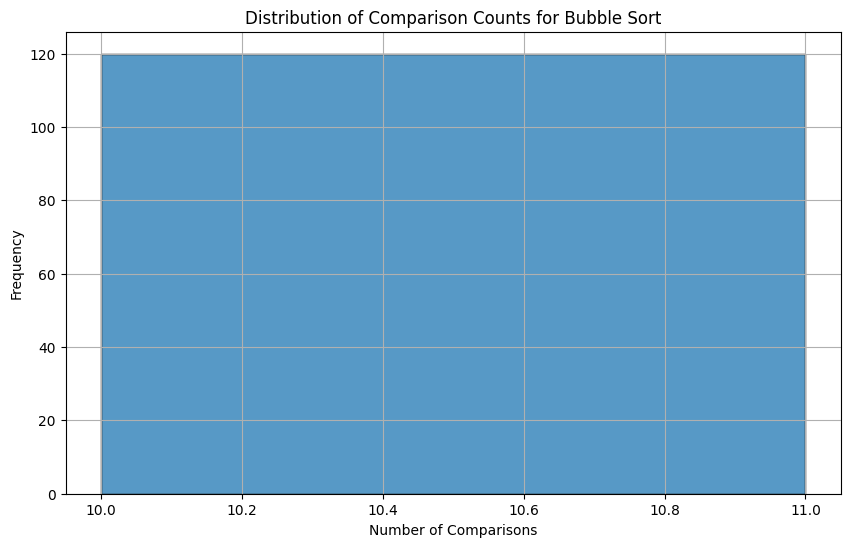

In [3]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modified Bubble Sort that counts comparisons
def bubble_sort_with_comparisons(arr):
    n = len(arr)
    comparisons = 0
    arr = arr.copy()
    for i in range(n):
        for j in range(0, n - i - 1):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return comparisons

    import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modified Bubble Sort that counts comparisons
def bubble_sort_with_comparisons(arr):
    n = len(arr)
    comparisons = 0
    arr = arr.copy()
    for i in range(n):
        for j in range(0, n - i - 1):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return comparisons

# Input list
L = [1, 2, 3, 4, 5]

# Generate all permutations
permutations = list(itertools.permutations(L))

# Run bubble sort on each permutation and store results
results = [(list(p), bubble_sort_with_comparisons(list(p))) for p in permutations]
df = pd.DataFrame(results, columns=["Permutation", "Comparisons"])

# Display the table
from IPython.display import display
display(df)

# Plot histogram of comparisons
plt.figure(figsize=(10, 6))
sns.histplot(df["Comparisons"], bins=range(df["Comparisons"].min(), df["Comparisons"].max()+2), kde=False)
plt.title("Distribution of Comparison Counts for Bubble Sort")
plt.xlabel("Number of Comparisons")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
